In [1]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Specify the paths for the 2 files
#protoFile = "pose/mpi/pose_deploy_linevec.prototxt"
#weightsFile = "pose/mpi/pose_iter_160000.caffemodel"

MODE = "MPI"

if MODE is "COCO":
    #protoFile = "pose/coco/pose_deploy_linevec.prototxt"
    #weightsFile = "pose/coco/pose_iter_440000.caffemodel"
    prototxt_path = os.path.join('models/pose_deploy_linevec.prototxt')
    caffemodel_path = os.path.join('models/pose_iter_440000.caffemodel')
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]


elif MODE is "MPI" :
    #protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    #weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
    prototxt_path = os.path.join('models/pose_deploy_linevec_faster_4_stages.prototxt')
    caffemodel_path = os.path.join('models/pose_iter_160000.caffemodel')
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

In [3]:
# Read image
frame = cv2.imread("vijay.jpg")
#frame = cv2.imread("single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1
 
# Specify the input image dimensions
inWidth = 368
inHeight = 368
 
# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (200, 200), (0, 0, 0), swapRB=False, crop=False)
 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [4]:
output = net.forward()

'# Empty list to store the detected keypoints\npoints = []\nfor i in range(len()):\n    # confidence map of corresponding body\'s part.\n    probMap = output[0, i, :, :]\n \n    # Find global maxima of the probMap.\n    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)\n \n    # Scale the point to fit on the original image\n    x = (frameWidth * point[0]) / W\n    y = (frameHeight * point[1]) / H\n \n    if prob&amp;amp;amp;lt; threshold :\n        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv.FILLED)\n        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)\n \n        # Add the point to the list if the probability is greater than the threshold\n        points.append((int(x), int(y)))\n    else :\n        points.append(None)\n \ncv2.imshow("Output-Keypoints",frame)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

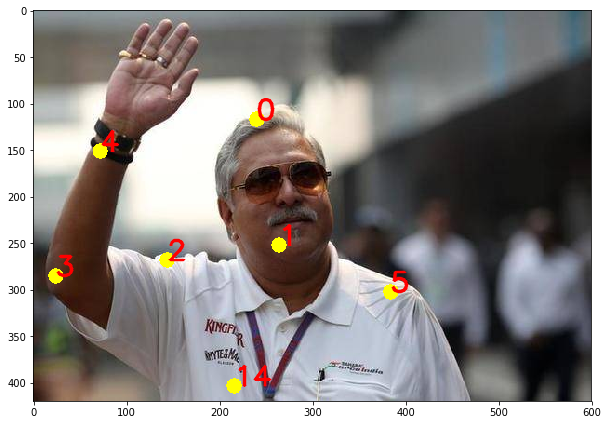

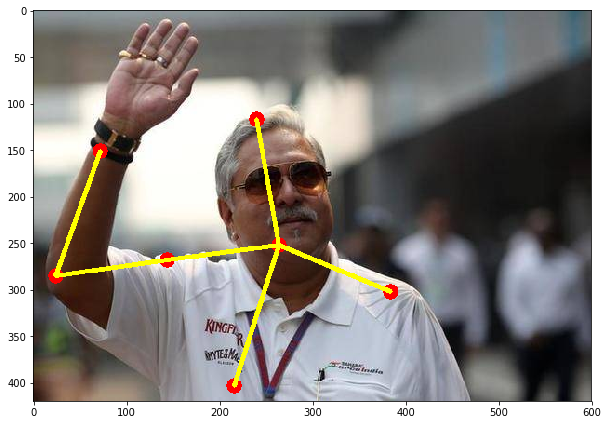

In [5]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
'''# Empty list to store the detected keypoints
points = []
for i in range(len()):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
 
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
 
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
 
    if prob&amp;amp;amp;lt; threshold :
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)
 
cv2.imshow("Output-Keypoints",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()'''